# Importing the Data Set

In [1]:
import pandas as pd

In [2]:
#White Wine
#df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',na_values='?',sep=';')
#Red Wine
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',na_values='?',sep=';')

# Data Description

In [3]:
df.shape

(1599, 12)

In [4]:
df.head().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


# Data Analysis and Visualization

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

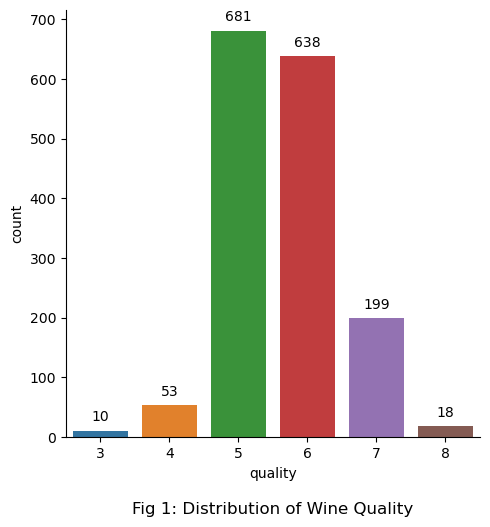

In [10]:
g = sns.catplot(x='quality', data=df, kind='count')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(p.get_height(), xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                    xytext=(0, 10), textcoords='offset points', ha='center', va='center')
        
plt.title("Fig 1: Distribution of Wine Quality",y=-.2, fontsize=12)
plt.show()

# Data Correlation

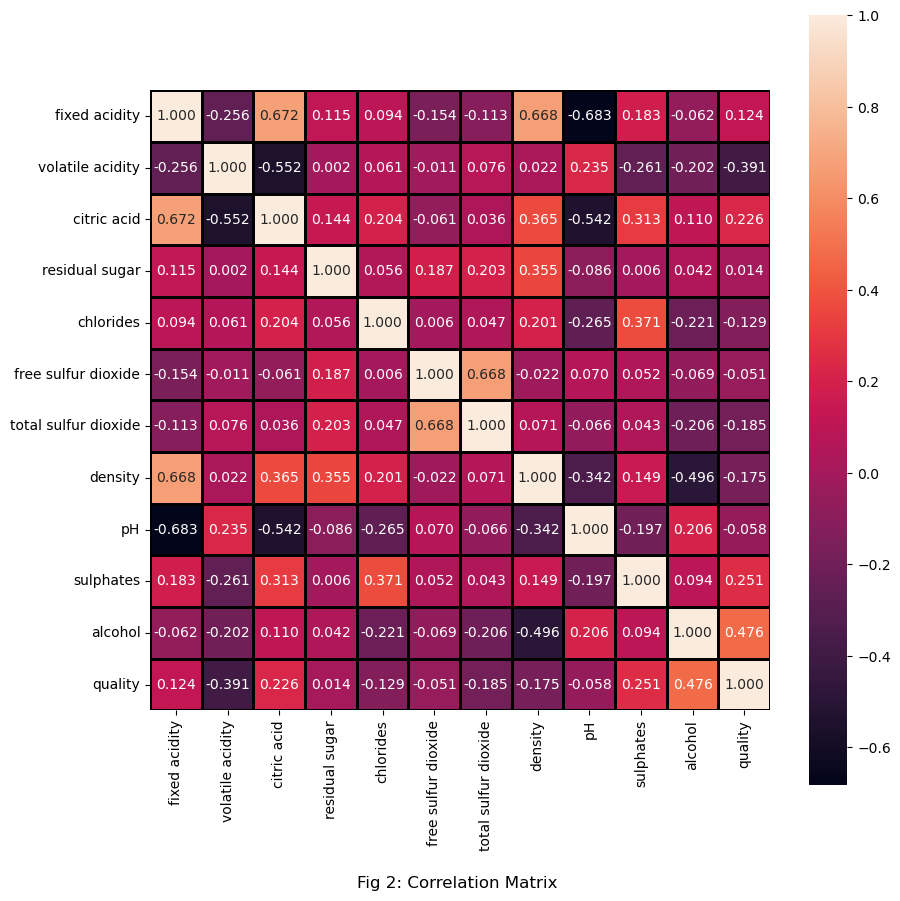

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,annot=True,fmt='.3f',annot_kws={'size':10},cmap='rocket',linewidths=1,linecolor='black')
plt.title("Fig 2: Correlation Matrix ",y=-.3, fontsize=12)
plt.show()

# Data Preprocessing

In [12]:
data=df.drop(columns='quality')

In [13]:
target=df['quality']

In [14]:
target = target.apply(lambda x: 0 if x<5 else (1 if x<7 else 2))

# Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

In [16]:
x_test, x_train, y_test, y_train=tts(data,target,test_size=0.2,random_state=2)

# Implementing Perceptron

In [17]:
from sklearn.linear_model import Perceptron

In [18]:
p=Perceptron(penalty='l2',random_state=4)

In [19]:
p.fit(x_train,y_train)

Perceptron(penalty='l2', random_state=4)

In [20]:
train_pred=p.predict(x_train)

In [21]:
test_pred=p.predict(x_test)

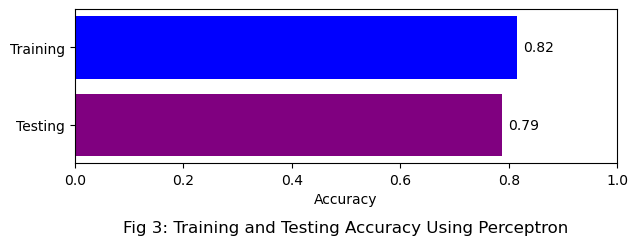

In [22]:
plt.figure(figsize=(7, 2))
plt.barh(y=["Testing","Training"], width=[accuracy_score(test_pred,y_test), accuracy_score(train_pred, y_train)], color=["purple", "blue"])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.text(accuracy_score(train_pred, y_train)+0.01, 1, f"{accuracy_score(train_pred, y_train):.2f}", va='center')
plt.text(accuracy_score(test_pred,y_test)+0.01, 0, f"{accuracy_score(test_pred,y_test):.2f}", va='center')
plt.title("Fig 3: Training and Testing Accuracy Using Perceptron",y=-0.5)
plt.show()

# Implementing Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
Di_Tr=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [25]:
Di_Tr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
Di_Tr_train_pred=Di_Tr.predict(x_train)

In [27]:
Di_Tr_test_pred=Di_Tr.predict(x_test)

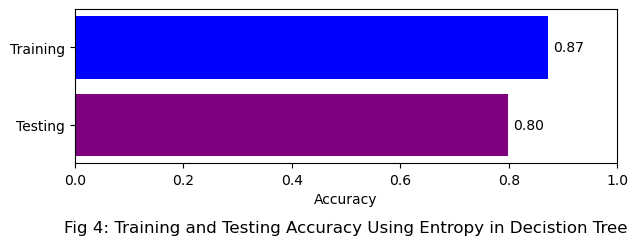

In [28]:
plt.figure(figsize=(7, 2))
plt.barh(y=["Testing","Training"], width=[accuracy_score(Di_Tr_test_pred, y_test), accuracy_score(Di_Tr_train_pred, y_train)], color=["purple", "blue"])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.text(accuracy_score(Di_Tr_test_pred, y_test)+0.01, 0, f"{accuracy_score(Di_Tr_test_pred, y_test):.2f}", va='center')
plt.text(accuracy_score(Di_Tr_train_pred, y_train)+0.01, 1, f"{accuracy_score(Di_Tr_train_pred, y_train):.2f}", va='center')
plt.title("Fig 4: Training and Testing Accuracy Using Entropy in Decistion Tree",y=-0.5)
plt.show()

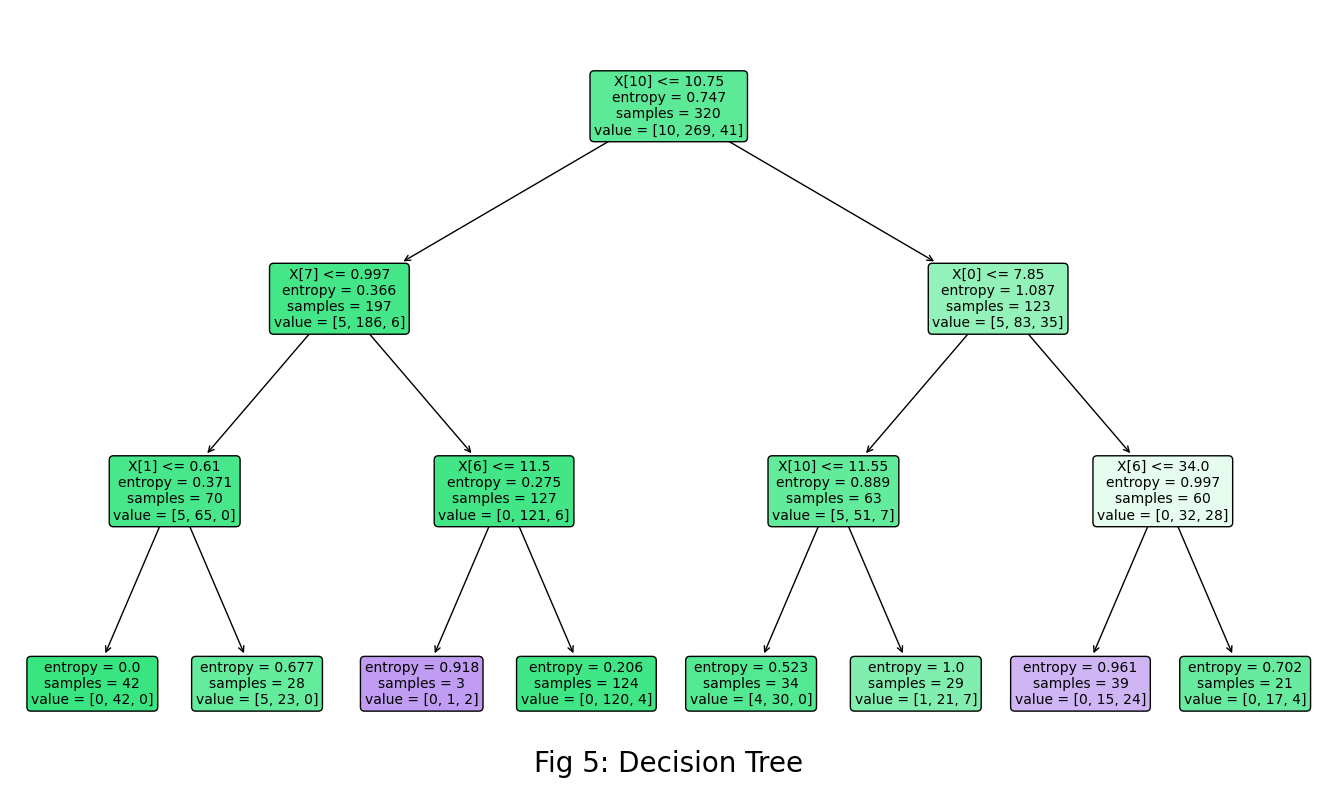

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(17, 10))
plot_tree(Di_Tr,fontsize="10",rounded ='True',filled=True)
plt.title("Fig 5: Decision Tree",y=0,fontsize="20")
plt.show()

# Implementing SVM model

In [30]:
from sklearn.svm import SVC

In [31]:
svc1=SVC(kernel='rbf')

In [32]:
svc1.fit(x_train,y_train)

SVC()

In [33]:
svc_train_pred=svc1.predict(x_train)

In [34]:
svc_test_pred=svc1.predict(x_test)

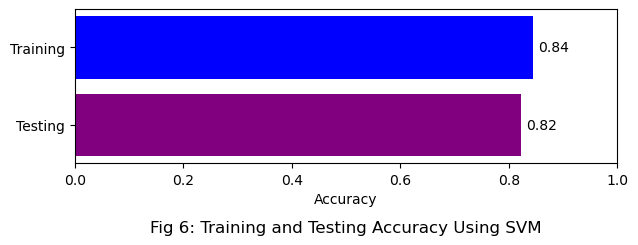

In [35]:
plt.figure(figsize=(7, 2))
plt.barh(y=["Testing","Training"], width=[accuracy_score(y_test, svc_test_pred), accuracy_score(y_train,svc_train_pred)], color=["purple", "blue"])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.text(accuracy_score(y_train,svc_train_pred)+0.01, 1, f"{accuracy_score(y_train,svc_train_pred):.2f}", va='center')
plt.text(accuracy_score(y_test, svc_test_pred)+0.01, 0, f"{accuracy_score(y_test, svc_test_pred):.2f}", va='center')
plt.title("Fig 6: Training and Testing Accuracy Using SVM",y=-0.5)
plt.show()

# Implementing SVM model With Pipeline

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [37]:
pipe1=Pipeline([('sc',StandardScaler()),('pca',PCA()),('svm',svc1)])

In [38]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()), ('svm', SVC())])

In [39]:
pipeline_train_prediction=pipe1.predict(x_train)

In [40]:
pipeline_test_prediction=pipe1.predict(x_test)

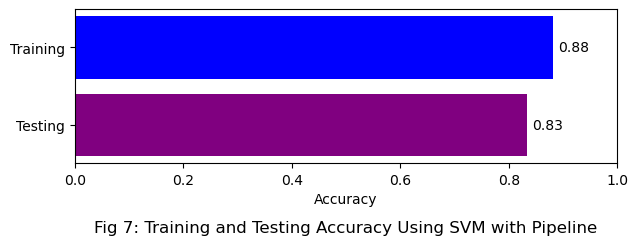

In [41]:
plt.figure(figsize=(7, 2))
plt.barh(y=["Testing","Training"], width=[accuracy_score(pipeline_test_prediction,y_test), accuracy_score(pipeline_train_prediction,y_train)], color=["purple", "blue"])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.text(accuracy_score(pipeline_train_prediction,y_train)+0.01, 1, f"{accuracy_score(pipeline_train_prediction,y_train):.2f}", va='center')
plt.text(accuracy_score(pipeline_test_prediction,y_test)+0.01, 0, f"{accuracy_score(pipeline_test_prediction,y_test):.2f}", va='center')
plt.title("Fig 7: Training and Testing Accuracy Using SVM with Pipeline",y=-0.5)
plt.show()

# Ratio of the Data Model Test Accuracy

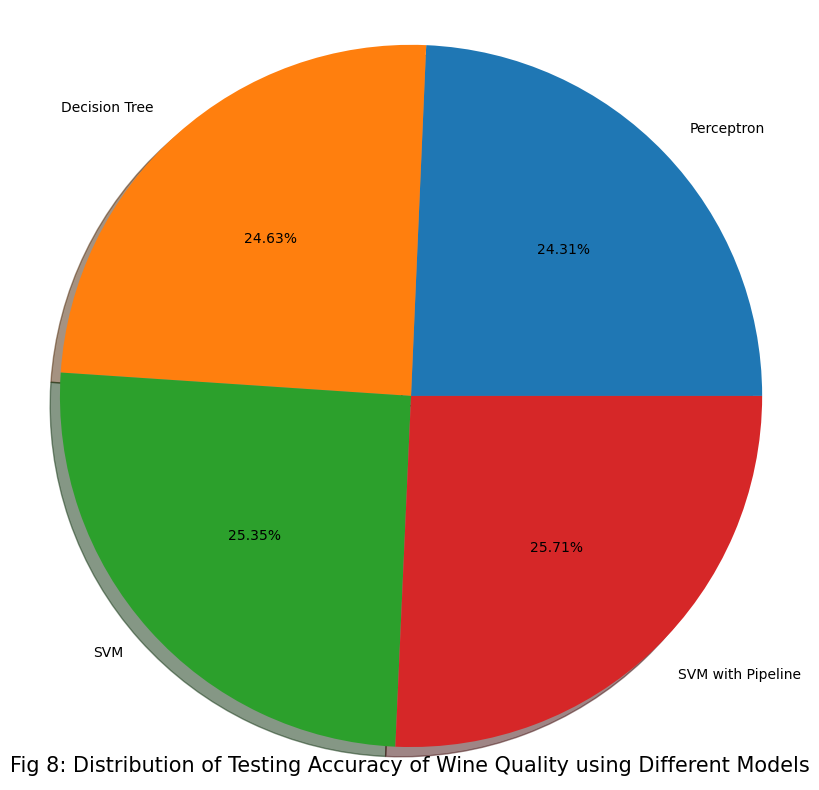

In [42]:
fig = plt.figure(figsize=(10, 10))
labels = 'Perceptron', 'Decision Tree','SVM','SVM with Pipeline'
sizes = [accuracy_score(test_pred,y_test),accuracy_score(Di_Tr_test_pred,y_test),
        accuracy_score(y_test, svc_test_pred),accuracy_score(pipeline_test_prediction,y_test)]

plt.pie(sizes, labels=labels, autopct='%.2f%%',shadow=True, startangle=0)
plt.axis('equal') 
plt.title("Fig 8: Distribution of Testing Accuracy of Wine Quality using Different Models",y=0,fontsize='15')
plt.show()

# HyperParameter Tuning for Perceptron

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000],
    'eta0': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(p, param_grid, cv=5)
grid_search.fit(x_train,y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.01, 'eta0': 0.1, 'max_iter': 100, 'penalty': 'elasticnet'}
Best Score: 0.840625


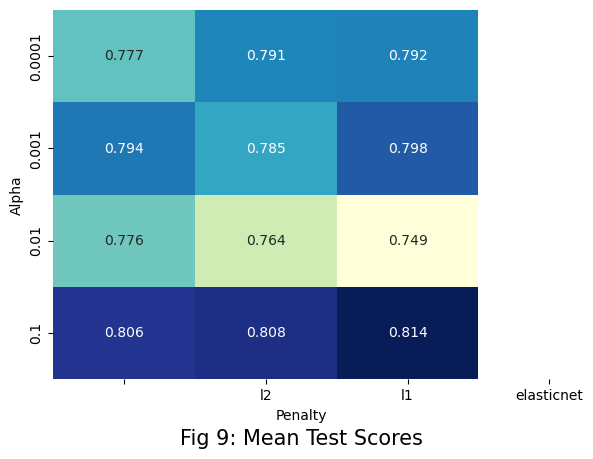

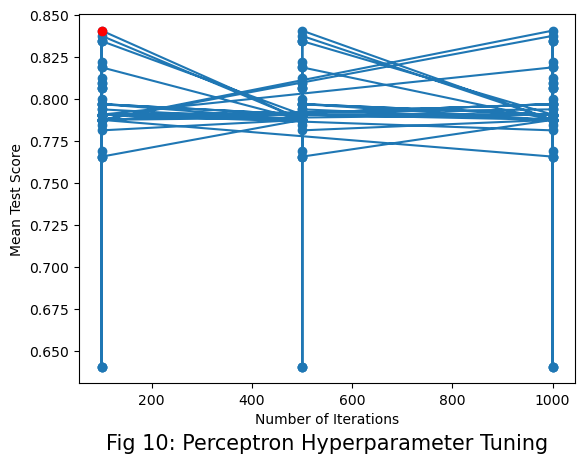

In [66]:
results = grid_search.cv_results_

scores = results['mean_test_score'].reshape(len(param_grid['alpha']), 
                                            len(param_grid['max_iter']), 
                                            len(param_grid['penalty']), 
                                            len(param_grid['eta0']))
sns.heatmap(scores.mean(axis=(2,3)), cmap="YlGnBu", 
            xticklabels=param_grid['penalty'], 
            yticklabels=param_grid['alpha'], 
            annot=True, fmt='.3g', cbar=False)
plt.xlabel('Penalty')
plt.ylabel('Alpha')
plt.title('Fig 9: Mean Test Scores',y=-1/5,fontsize='15')

best_score = grid_search.best_score_
plt.figure()
plt.plot(results['param_max_iter'], results['mean_test_score'], '-o')
plt.plot(results['param_max_iter'][grid_search.best_index_], best_score, 'ro')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Test Score')
plt.title('Fig 10: Perceptron Hyperparameter Tuning',y=-1/5,fontsize='15')
plt.show()

# Hyper Parameter Tuning for DecisionTree

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.83125


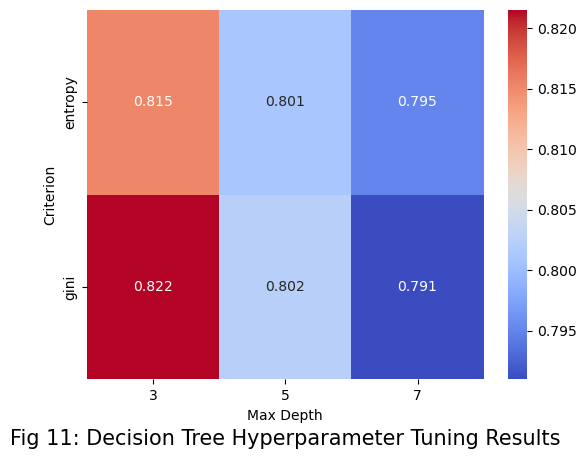

In [90]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(Di_Tr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

results = pd.DataFrame(grid_search.cv_results_)
sns.heatmap(results.pivot_table(values='mean_test_score', index='param_criterion', columns='param_max_depth'), annot=True, fmt='.3f', cmap='coolwarm')
plt.xlabel('Max Depth')
plt.ylabel('Criterion')
plt.title('Fig 11: Decision Tree Hyperparameter Tuning Results',y=-1/5,fontsize='15')
plt.show()

# HyperParameter Tuning for SVC

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

random_grid = {
    'C': uniform(0, 10),
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'kernel': ['linear', 'rbf'],
    'degree': randint(2, 4),
#     'gamma': ['scale', 'auto', uniform(0.1, 1)]
    'gamma': [0.1,1]
}

random_search = RandomizedSearchCV(svc1, random_grid, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'C': 7.116835321380507, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.840625


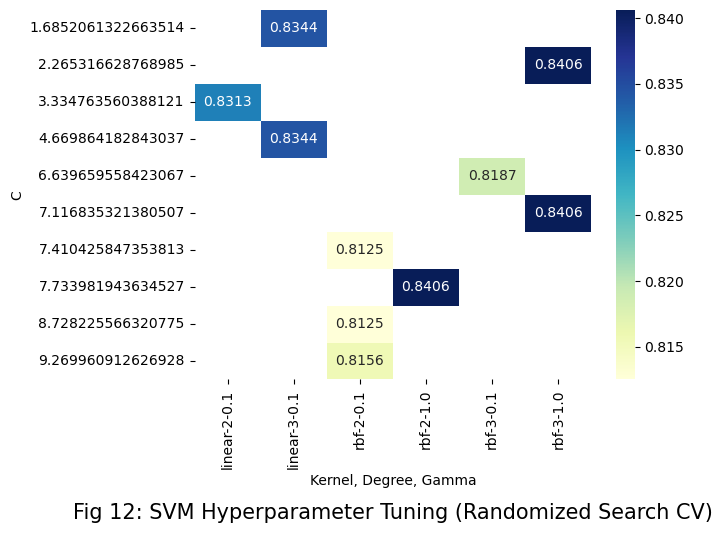

In [91]:
results_df = pd.DataFrame.from_dict(random_search.cv_results_)

columns = ['param_C', 'param_kernel', 'param_degree', 'param_gamma', 'mean_test_score']
results_df = results_df[columns]

results_df['param_C'] = pd.to_numeric(results_df['param_C'])
results_df['param_degree'] = pd.to_numeric(results_df['param_degree'])
results_df['param_gamma'] = pd.to_numeric(results_df['param_gamma'])

sns.heatmap(results_df.pivot_table(values='mean_test_score', index='param_C', 
            columns=['param_kernel', 'param_degree', 'param_gamma']), 
            annot=True, fmt='.4g', cmap='YlGnBu')

plt.title('Fig 12: SVM Hyperparameter Tuning (Randomized Search CV)',y=-1/2.5,fontsize='15')
plt.xlabel('Kernel, Degree, Gamma')
plt.ylabel('C')
plt.show()

In [ ]:
# High load with gridsearchCV

In [ ]:
# param_grid = {
#     'C': [1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3],
#     'gamma': ['scale', 'auto', 0.1, 1]
# }

# grid_search = GridSearchCV(svc1, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [ ]:
# cv_results = grid_search.cv_results_

# results_df = pd.DataFrame(cv_results)

# columns = ['param_C', 'param_kernel', 'param_degree', 'param_gamma', 'mean_test_score']
# results_df = results_df[columns]

# results_df['param_C'] = pd.to_numeric(results_df['param_C'])
# results_df['param_degree'] = pd.to_numeric(results_df['param_degree'])
# results_df['param_gamma'] = pd.to_numeric(results_df['param_gamma'])

# sns.heatmap(results_df.pivot_table(values='mean_test_score', index='param_C', columns=['param_kernel', 'param_degree', 'param_gamma']), annot=True, fmt='.4g', cmap='YlGnBu')

# plt.title('SVM Hyperparameter Tuning')
# plt.xlabel('Kernel, Degree, Gamma')
# plt.ylabel('C')
# plt.show()